# Python built-in functions and libraries for root finding

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Python built-in root finding functions and capabilities

Python provides several functions and libraries for root finding. This notebook demonstrate some of these.

* Numpy's "roots(...)" function for the roots of **polynomials**: Note that this function is for polynomials only. To use this function, the user needs to pass the coefficients of the polynomial in an array. See example below. Based on the documentation, the algorithm behind this function is from computing of the eigenvalues of the companion matrix. More details can be found in this reference:

> R. A. Horn & C. R. Johnson, Matrix Analysis. Cambridge, UK: Cambridge University Press, 1999, pp. 146-7. 

* [SciPy (Scientific Python)](https://www.scipy.org): a Python library for scientific computing and technical computing. Note that when you study SciPy, you may encounter another library named "ScientificPython" which is totally a different one (not actively developed anymore). SciPy is a software ecosystem which contains modules for common computational tasks in science and engineering, such as optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, and solving ODEs. It sounds like it covers all the topics we will cover in this course. However, again, in order to understand what is going on under the hood, we need to know the fundamentals and theories.

    The Numpy module is in fact part of SciPy. Indeed, **SciPy** is built based on the Numpy array objects. In addition to Numpy, SciPy's main modules also include SciPy core library for scientific computing, Matplotlib for plotting, IPython for interactive console, Sympy for symbolic mathematics, and pandas for data structure and analysis. 

    **SciPy** (current version 1.2 as of Jan. 2019) implements the following bracketing root finding methods: bisection (slowest among all, but guaranteed to converge), Brent’s method, and Ridder’s method. For open or derivative-based methods, they are all based on the Newton-Raphson method, which converge more quickly if the initial guess is close to the root. All these implementations are in the "optimize" module 

    In addition, SciPy also implements "root(...)" and "fsolve(...)" functions to find a root of a vector function in multidimensional space.

    The following is an example on how to use the "root()" function in **SciPy**'s "**optimize**" module to find the roots of the cubic polynomial:
    \begin{equation}
    f(x) = 2.0 x^3 - 6x^2+x+2.5
    \end{equation}

[-0.52854363  0.89959512  2.62894851]
[-2.46469511e-13 -2.31814568e-13 -1.21236354e-12]


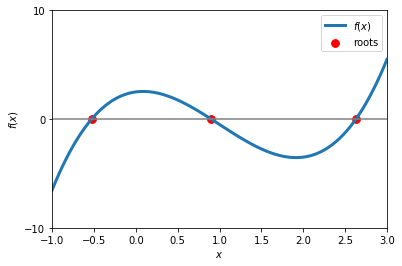

In [1]:
#make the plot inline
%matplotlib inline

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define the polynomial function and its coefficients
#Paramters defined in this fashion is called "optional".
def fun(x, a=2.0, b=-6, c=1, d=2.5):
    return a * x ** 3 + b * x ** 2 + c * x + d

#find the roots with the "root" function in scipy
sol = optimize.root(fun,[-0.5, 1.0, 2.5])  #initial guesses are x=-0.5, 1.0, and 2.5. 
print(sol.x)        #print the roots
print(fun(sol.x))   #print the function values at the roots (should be close to zero)

#plot the function
x = np.linspace(-1, 3, 100)
plt.plot(x, fun(x), label=r'$f(x)$', lw=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.axhline(0, color='gray', lw=1.5)
plt.yticks([-10, 0 , 10])
plt.xlim(-1,3)
plt.ylim(-10, 10)

#plot the roots as scatter
plt.scatter(sol.x, fun(sol.x), color="red",s=60, label=r'roots')

#show the legend
plt.legend()

#show the plot
plt.show()

---
The following example shows how to use the "root(...)" function in Numpy. The meaning of the parameters can be found in the documentation of "root(...)".

In [2]:
import numpy as np

#use Numpy's roots(...) function
p = [2,-6,1,2.5]

#call the roots function; the returned value is an array.
sols = np.roots(p)

#print out the solutions
print(sols)

[ 2.62894851  0.89959512 -0.52854363]


The following example shows how to use the bisection method, Newton-Raphson method, and the "fsolve(...)" function in **SciPy**'s "**optimize**" module. Based on the documentation, the "fsolve(...)" function is a wrapper around MINPACK's ***hybrd*** and ***hybrj*** algorithms, which are used for optimizations. Indeed, root finding can be casted as an optimization problem in the sense that to find a root which minimized the difference between function value and zero. The details of MINPACK can be found [here](https://www.netlib.org/minpack/).

In [5]:
from scipy import optimize

#define the function
def f(x):
    y = x + 2*np.cos(x)
    return y
         
#directly call SciPy optimize's bisect method
sol1=optimize.bisect(f, -2, 2)        # starting interval [-2, 2]

#directly call SciPy optimize's newton method
sol2=optimize.newton(f,  100)      # starting point x0 = 2

#use fsolve(...) function
sol3 = optimize.fsolve(f, 0.3) 

#print out the solutions from the three different function calls
print(sol1)
print(sol2)
print(sol3[0])

print("Done!")

-1.0298665293212252
-1.0298665293222589
-1.029866529322259
Done!
